In [46]:
import os

input_folder = '/content/drive/MyDrive/real_masks/Data2_nonaug'
output_folder = '/content/drive/MyDrive/real_masks/Data2_nonaugg'

os.makedirs(output_folder, exist_ok=True)

os.chdir(input_folder)

for file_name in os.listdir(input_folder):
    if file_name.lower().endswith(".jpg"):
        old_path = os.path.join(input_folder, file_name)
        new_path = os.path.join(output_folder, file_name.lower())
        os.rename(old_path, new_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(256, 256)
(256, 256)


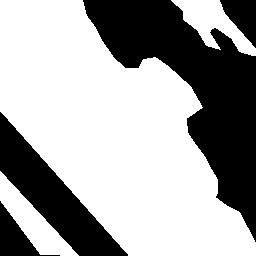

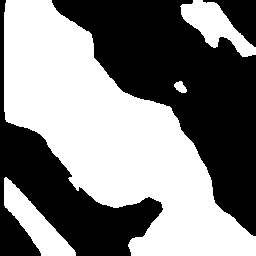

[[255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
{0: 56494, 1: 9042}
(256, 256)
0.137969970703125


In [33]:
import cv2
import os
from google.colab import drive
from google.colab.patches import cv2_imshow

# Mount Google Drive to access the folders
drive.mount('/content/drive')
true = cv2.imread('/content/drive/MyDrive/predicted_masks/test/tru.jpg',cv2.IMREAD_GRAYSCALE)
pred = cv2.imread('/content/drive/MyDrive/predicted_masks/test/pred.jpg',cv2.IMREAD_GRAYSCALE)
true = cv2.resize(true, (256,256))
pred = cv2.resize(pred, (256,256))
# cv2_imshow(pred)
print(true.shape)
print(pred.shape)
threshold = 127
_, true = cv2.threshold(true, threshold, 255, cv2.THRESH_BINARY)
_, pred = cv2.threshold(pred, threshold, 255, cv2.THRESH_BINARY)
# pred[pred == 255] = 1
# true[true == 255] = 1
cv2_imshow(true)
cv2_imshow(pred)
# print(true.shape)
# print(res)
# print(pred)
# if img1.shape == img2.shape:
                # Subtract pixel values and append the result to the list
result = cv2.subtract(true, pred)
print(result)
result[result == 255] = 1
import numpy as np
import pandas as pd
def get_frequency_2d_array_pandas(arr):
    # Flatten the 2D array
    flat_arr = np.array(arr).flatten()

    # Use the value_counts() function to get the frequency of each unique value
    frequency_series = pd.value_counts(flat_arr)

    # Convert the result to a dictionary
    frequency_dict = frequency_series.to_dict()

    return frequency_dict

result1 = get_frequency_2d_array_pandas(result)
print(result1)
print(result.shape)
error = (np.sum(result))/(256*256)

errors.append(error)


In [1]:
import cv2
import os
import numpy as np
# from google.colab import drive

# Mount Google Drive to access the folders
# drive.mount('/content/drive')

def compare_images(folder1_path, folder2_path):
    # List to store the results of image comparison
    errors = []
    image_names = []

    # Get the list of files in both folders
    folder1_files = os.listdir(folder1_path)
    folder2_files = os.listdir(folder2_path)

    # Iterate through the files in the first folder
    # for filename in folder1_files:
    #     filename = filename[:-3]
    # for filename in folder2_files:
    #     filename = filename.lower()
    for filename in folder1_files:
        print(filename)
        if filename in folder2_files:
            # Construct the full file paths
            file1_path = os.path.join(folder1_path, filename)
            file2_path = os.path.join(folder2_path, filename)

            # Read images using cv2
            img1 = cv2.imread(file1_path, cv2.IMREAD_GRAYSCALE)
            img2 = cv2.imread(file2_path, cv2.IMREAD_GRAYSCALE)
            threshold = 127
            _, true = cv2.threshold(img1, threshold, 255, cv2.THRESH_BINARY)
            _, pred = cv2.threshold(img2, threshold, 255, cv2.THRESH_BINARY)


            # Ensure that both images have the same size
            if img1.shape == img2.shape:
                # Subtract pixel values and append the result to the list
                result = cv2.subtract(true, pred)
                result[result == 255] = 1
                result[result == -255] = 1
                print(result)
                error = (np.sum(result))/(256*256)
                errors.append(error)
                image_names.append(filename)

            else:
                print(f"Images {filename} have different sizes and cannot be compared.")

    return errors, image_names

# Example usage:
folder1_path = 'Karachi_2\Masks'
folder2_path = 'Karachi_2\Predictions\DATA_1_AUG'

comparison_results = compare_images(folder1_path, folder2_path)
print(comparison_results)

ges_359756_298370_20.jpg
ges_359756_298371_20.jpg
ges_359757_298369_20.jpg
ges_359757_298371_20.jpg
ges_359758_298369_20.jpg
ges_359758_298371_20.jpg
ges_359759_298369_20.jpg
ges_359759_298370_20.jpg
ges_359759_298371_20.jpg
([], [])


In [3]:
mean = (sum(comparison_results[0])/(len(comparison_results[0])+1e-07))
file_name = "Karachi_2\Pixel_Wise_Error\Err_DATA_1_AUG.txt"

# Open the file in write mode
with open(file_name, 'w') as file:
    # Write each item in the list to a new line
    i=0
    for item in comparison_results[0]:
        file.write(f"{comparison_results[1][i]} --> {item}\n")
        i+=1
    file.write("mean: %f" % mean)